# Création de fichiers intermédiaires sans les glaciers (test pour un modèle before regridding)

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-04-02T12:49:08.501581+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-31-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import xesmf as xe
import matplotlib.pyplot as plt
import glob

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [3]:
%watermark --iversions

pandas    : 2.2.3
xesmf     : 0.8.8
watermark : 2.5.0
xarray    : 2025.1.1
matplotlib: 3.10.0
numpy     : 2.0.2



## Exemple de fichier historique

In [4]:
path_BCC_CSM2 = os.path.join("~/private-storage/historical-LImon-snc/", "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")

BCC_CSM2 = xr.open_dataset(path_BCC_CSM2)
BCC_CSM2

<xarray.Dataset> Size: 406MB
Dimensions:    (time: 1980, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
  * lon        (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 5kB ...
    snc        (time, lat, lon) float32 406MB ...
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2289.0
    comment:                The model integration starts from the piControl e...
    ...                     ...
    title:                  BCC-CSM2-MR output prepared for CMIP6
    tracking_id:            hdl:21.14100/b44193ab-576d-4f12-b31f-5f319b74252e
    variable_id:            snc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by BCC is licensed unde...
    cmor_version:           3.3.2

In [5]:
snow_cover_ini = BCC_CSM2["snc"]
snow_cover_ini

<xarray.DataArray 'snc' (time: 1980, lat: 160, lon: 320)> Size: 406MB
[101376000 values with dtype=float32]
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Attributes:
    standard_name:  surface_snow_area_fraction
    long_name:      Snow Area Fraction
    comment:        Fraction of each grid cell that is occupied by snow that ...
    units:          %
    original_name:  SNC
    cell_methods:   area: time: mean (interval: 20 minutes)
    cell_measures:  area: areacella
    history:        2018-11-14T10:00:09Z altered by CMOR: replaced missing va...

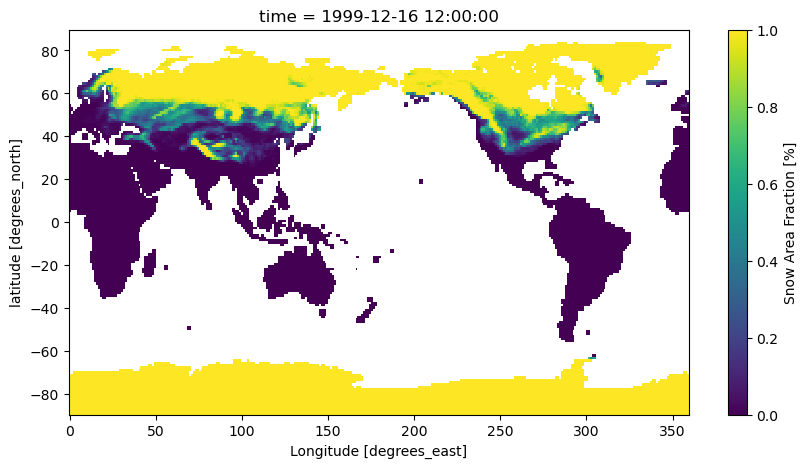

In [6]:
snow_cover_ini_1800 = snow_cover_ini.isel(time = 1799)

plt.figure(figsize=(10, 5))
snow_cover_ini_1800.plot()

## Exemple de masque associé

In [7]:
path_sftgif_BCC_CSM2 = os.path.join("~/private-storage/masques/masques/pseudo_sftgif/", "sftgif_BCC-CSM2-MR.nc")

sftgif_BCC_CSM2 = xr.open_dataset(path_sftgif_BCC_CSM2)
sftgif_BCC_CSM2

<xarray.Dataset> Size: 216kB
Dimensions:   (lon: 320, bnds: 2, lat: 160)
Coordinates:
  * lon       (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat       (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 5kB ...
    lat_bnds  (lat, bnds) float64 3kB ...
    sftgif    (lat, lon) float32 205kB ...
Attributes: (12/54)
    CDI:                    Climate Data Interface version 1.6.8 (http://mpim...
    history:                Tue Sep 03 22:30:58 2019: cdo remapbil,grid_BCC-C...
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    CDO:                    Climate Data Operators version 1.6.8 (http://mpim...

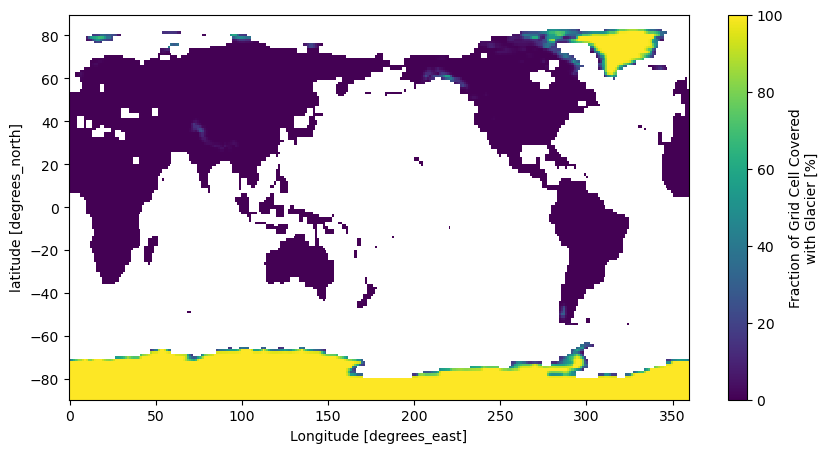

In [8]:
plt.figure(figsize=(10, 5))
sftgif_BCC_CSM2["sftgif"].plot()

## Test de filtre pour ignorer les glaciers

In [9]:
sftgif = sftgif_BCC_CSM2["sftgif"]

In [10]:
print("snow_cover_ini lat:", snow_cover_ini.coords['lat'])
print("snow_cover_ini lon:", snow_cover_ini.coords['lon'])

print("sftgif lat:", sftgif.coords['lat'])
print("sftgif lon:", sftgif.coords['lon'])

snow_cover_ini lat: <xarray.DataArray 'lat' (lat: 160)> Size: 1kB
array([-89.141518, -88.029427, -86.910774, -85.790627, -84.669922, -83.54895 ,
       -82.427818, -81.306595, -80.18531 , -79.06398 , -77.942627, -76.821243,
       -75.699844, -74.57843 , -73.457008, -72.335579, -71.214134, -70.09269 ,
       -68.971237, -67.849785, -66.728325, -65.606865, -64.485397, -63.363934,
       -62.242462, -61.120991, -59.999519, -58.878044, -57.756569, -56.635094,
       -55.513615, -54.392136, -53.270657, -52.149174, -51.027695, -49.906212,
       -48.784729, -47.663246, -46.541763, -45.42028 , -44.298794, -43.177311,
       -42.055824, -40.934338, -39.812851, -38.691364, -37.569881, -36.448391,
       -35.326904, -34.205418, -33.083931, -31.962444, -30.840956, -29.719467,
       -28.597979, -27.47649 , -26.355003, -25.233515, -24.112024, -22.990536,
       -21.869047, -20.747559, -19.62607 , -18.50458 , -17.383091, -16.2616  ,
       -15.140112, -14.018622, -12.897133, -11.775643, -10.654153

In [11]:
# arrondi à 4 décimales pour éviter légères diff
snow_cover_ini.coords['lat'] = snow_cover_ini.coords['lat'].round(4)
snow_cover_ini.coords['lon'] = snow_cover_ini.coords['lon'].round(4)

sftgif.coords['lat'] = sftgif.coords['lat'].round(4)
sftgif.coords['lon'] = sftgif.coords['lon'].round(4)

# alignement des deux ds
snow_cover_ini_aligned = snow_cover_ini.reindex_like(sftgif, method='nearest')

# applique le masque
glacier_mask = sftgif > 0
snow_cover_masked = snow_cover_ini_aligned.where(~glacier_mask, other=np.nan)

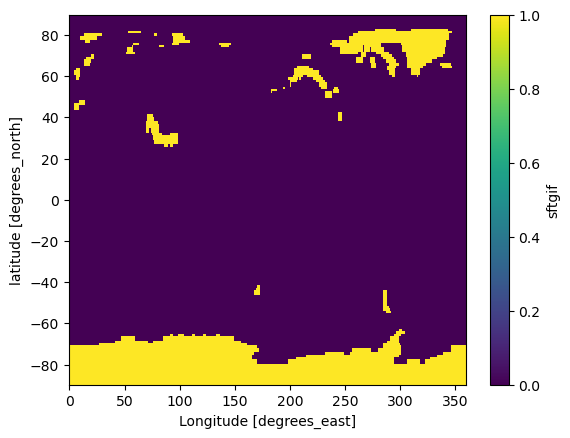

In [12]:
glacier_mask.plot()

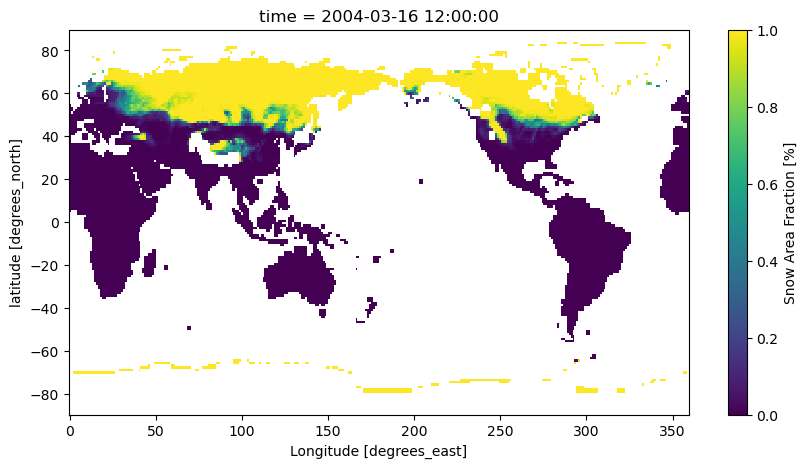

In [13]:
snow_cover_masked_1800 = snow_cover_masked.isel(time=1850)
snow_cover_masked_1800

plt.figure(figsize=(10, 5))
snow_cover_masked_1800.plot()

## Calcul expansion neige avec areacella

In [14]:
snow_cover_masked = snow_cover_masked.sel(time=slice("1995", "2014"))

In [15]:
snow_cover_masked = snow_cover_masked.groupby("time.month").mean(dim="time")

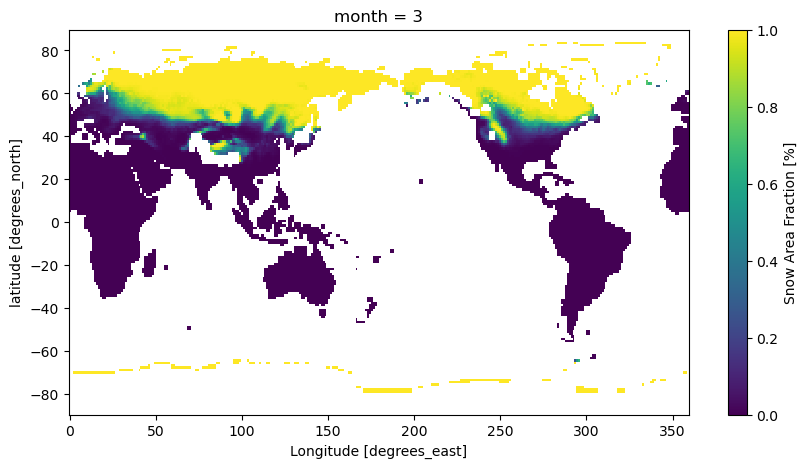

In [16]:
march_snow_cover = snow_cover_masked.sel(month=3)

plt.figure(figsize=(10, 5))
march_snow_cover.plot()

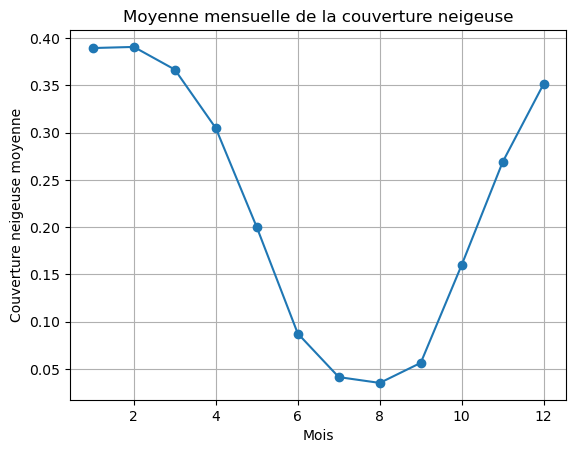

In [17]:
monthly_mean = snow_cover_masked.mean(dim=("lat", "lon"))

plt.plot(range(1, 13), monthly_mean, marker="o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

In [18]:
path_areacella_BCC_CSM2 = os.path.join("~/private-storage/masques/masques/pseudo_areacella/", "areacella_BCC-CSM2-MR.nc")

areacella_BCC_CSM2 = xr.open_dataset(path_areacella_BCC_CSM2)
areacella_BCC_CSM2

<xarray.Dataset> Size: 412kB
Dimensions:    (lon: 320, lat: 160)
Coordinates:
  * lon        (lon) float32 1kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
  * lat        (lat) float32 640B -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Data variables:
    areacella  (lat, lon) float64 410kB ...
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/...
    history:      Sat Dec 21 01:26:42 2019: ncrename -O --variable cell_area,...

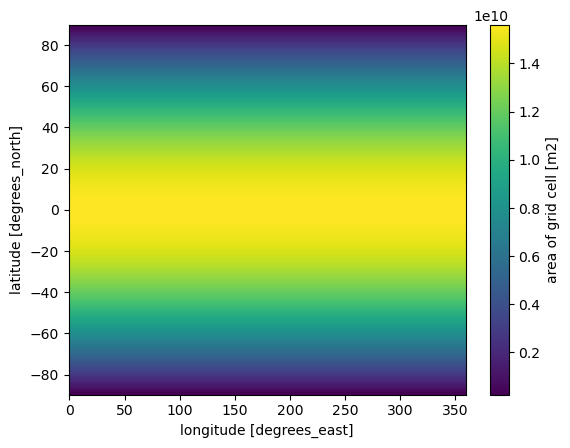

In [19]:
cell_area_ini = areacella_BCC_CSM2["areacella"]

cell_area_ini.plot()

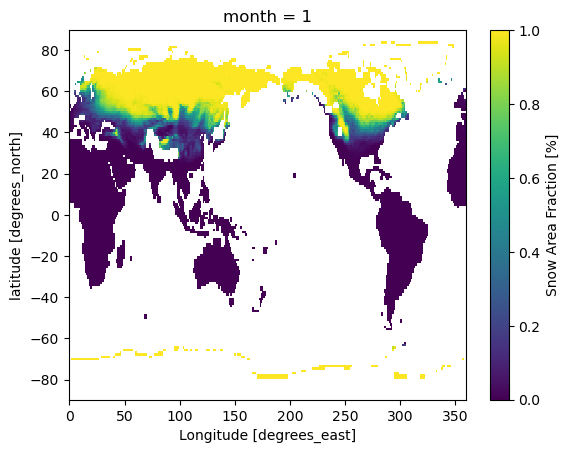

In [20]:
janvier = snow_cover_masked.isel(month=0)
janvier.plot()

In [21]:
print("snow_cover_masked lat:", snow_cover_masked.coords['lat'])
print("snow_cover_masked lon:", snow_cover_masked.coords['lon'])

print("cell_area_ini lat:", cell_area_ini.coords['lat'])
print("cell_area_ini lon:", cell_area_ini.coords['lon'])

snow_cover_masked lat: <xarray.DataArray 'lat' (lat: 160)> Size: 1kB
array([-89.1415, -88.0294, -86.9108, -85.7906, -84.6699, -83.5489, -82.4278,
       -81.3066, -80.1853, -79.064 , -77.9426, -76.8212, -75.6998, -74.5784,
       -73.457 , -72.3356, -71.2141, -70.0927, -68.9712, -67.8498, -66.7283,
       -65.6069, -64.4854, -63.3639, -62.2425, -61.121 , -59.9995, -58.878 ,
       -57.7566, -56.6351, -55.5136, -54.3921, -53.2707, -52.1492, -51.0277,
       -49.9062, -48.7847, -47.6632, -46.5418, -45.4203, -44.2988, -43.1773,
       -42.0558, -40.9343, -39.8129, -38.6914, -37.5699, -36.4484, -35.3269,
       -34.2054, -33.0839, -31.9624, -30.841 , -29.7195, -28.598 , -27.4765,
       -26.355 , -25.2335, -24.112 , -22.9905, -21.869 , -20.7476, -19.6261,
       -18.5046, -17.3831, -16.2616, -15.1401, -14.0186, -12.8971, -11.7756,
       -10.6542,  -9.5327,  -8.4112,  -7.2897,  -6.1682,  -5.0467,  -3.9252,
        -2.8037,  -1.6822,  -0.5607,   0.5607,   1.6822,   2.8037,   3.9252,
       

In [22]:
snow_cover_masked.coords['lat'] = snow_cover_masked.coords['lat'].round(4)
snow_cover_masked.coords['lon'] = snow_cover_masked.coords['lon'].round(4)

cell_area_ini.coords['lat'] = cell_area_ini.coords['lat'].round(4)
cell_area_ini.coords['lon'] = cell_area_ini.coords['lon'].round(4)

snow_cover_masked_aligned = snow_cover_masked.reindex_like(cell_area_ini, method='nearest')

In [23]:
snow_cover_km2 = (snow_cover_masked_aligned * (cell_area_ini * 1e-6) ).groupby(snow_cover_masked_aligned["month"]).sum(dim=["lat", "lon"], skipna=True)

print(snow_cover_km2)
print(snow_cover_km2.shape)

<xarray.DataArray (month: 12)> Size: 96B
array([38238736.60368108, 38326220.51182215, 35069375.52551098,
       27316887.5052117 , 16152586.47547983,  6050208.3988676 ,
        2377656.74858814,  1940460.13821171,  3582187.13900073,
       12467097.04416299, 23380063.78330895, 33283172.03108807])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
(12,)


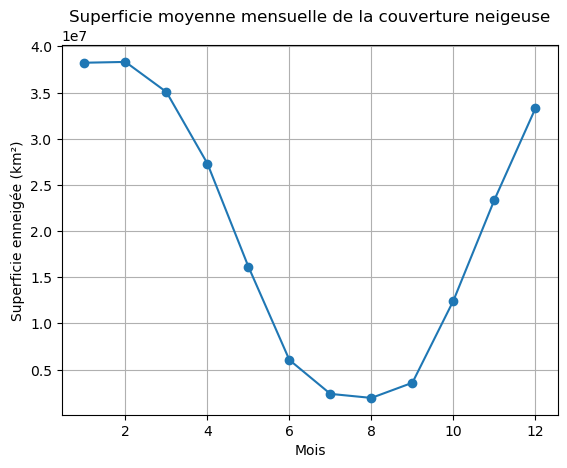

In [24]:
plt.plot(range(1, 13), snow_cover_km2, marker="o")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()